# Image Processing - Car in Showroom

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
# Read in the image
image = mpimg.imread('images/red_car.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (346, 612, 3)


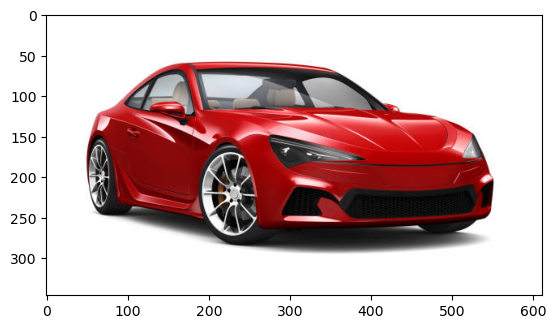

In [3]:
# Display the image
plt.imshow(image)
plt.show()

### Define the color threshold

In [4]:
# Define our color selection boundaries in RGB values
lower_red = np.array([215,235,230]) 
upper_red = np.array([255,255,255])


### Create a mask

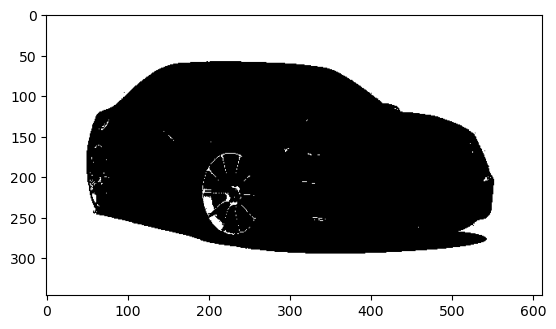

In [5]:
# Define the masked area
mask = cv2.inRange(image, lower_red, upper_red)

# Vizualize the mask
plt.imshow(mask, cmap='gray')
plt.show()

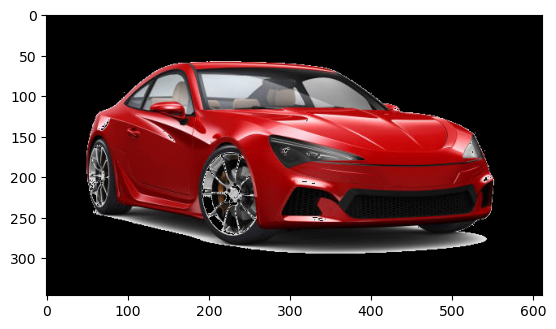

In [6]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)
plt.show()

### Mask and add a background image

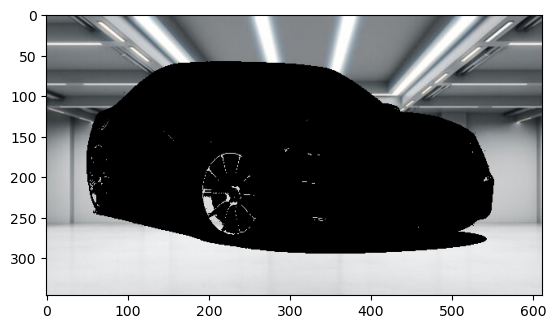

In [7]:
# Load in a background image, and convert it to RGB
background_image = cv2.imread('images/show_room_resized.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Crop background image or resize the background to be the right size
crop_background = background_image[0:image.shape[0], 0:image.shape[1]]

# Mask the cropped background so that the car area is blocked
crop_background[mask == 0] = [0, 0, 0]

# Display the background
plt.imshow(crop_background)
plt.show()

### Create a complete image

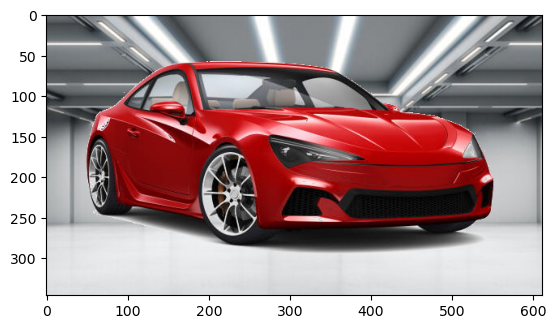

In [8]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display result
plt.imshow(complete_image)
plt.show()